### Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading csv file

In [12]:
FILENAME = 'datasets/articles_data_homeproject.csv'

articles_data = pd.read_csv(FILENAME, index_col=0)

### Show first n rows from dataframe

In [17]:
articles_data.head(n=2)

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0


### show datatypes

In [18]:
articles_data.dtypes

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

### Count empty/null files per attribute

In [25]:
articles_data.isnull().sum().to_frame()

,0
source_id,0
source_name,0
author,1020
title,2
description,24
url,1
url_to_image,656
published_at,1
content,1292
top_article,2


### Selecting attributes to analyze

In [27]:
ATTRIBUTES = [
    'source_name',
    'author',
    'engagement_reaction_count',
    'engagement_comment_count',
    'engagement_share_count',
    'engagement_comment_plugin_count'
]

### Droping any row that contains no data in one of it's attributes

In [28]:
data = articles_data[ATTRIBUTES].dropna(axis=0, how='any')

### Getting number of reactions and shares from every source

In [34]:
reaction_data = data.groupby('source_name')['engagement_reaction_count'].sum().to_frame()

In [36]:
share_data = data.groupby('source_name')['engagement_share_count'].sum().to_frame()

### Sites with highest number of articles

In [54]:
highest_source = data['source_name'].value_counts().to_frame()
highest_source

12


# Data Viz!!!

### Pie chart

In [56]:
# Turning the first attribute values to a list
labels = list(highest_source.index.values)
print(labels)

['Reuters', 'ABC News', 'Business Insider', 'The Irish Times', 'CNN', 'CBS News', 'The New York Times', 'BBC News', 'Newsweek', 'Al Jazeera English', 'The Wall Street Journal', 'ESPN']


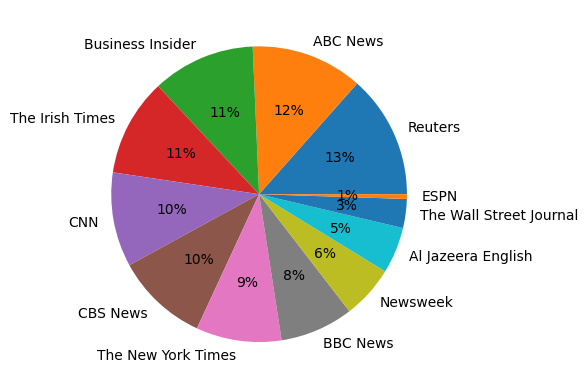

In [64]:
plt.pie(highest_source['count'], labels=labels, autopct='%1.0f%%')
plt.show()